<code>years_em</code> fueron completados con ceros

<code>years_demency</code> fueron completados con ceros

<code>tecar</code> reasignado con binario

<code>lateralidad</code> reasignado con binario: 1:diestro

<code>genero</code> reasignado con binario: 1:M 0:H

<code>tipico</code>, <code>tipico</code> y <code>deposito</code> han sido completadas con ceros en las casillas vacías (Entre los existentes ninguno tiene valor cero)

Paciente 10: variable <code>posee_dii</code> vacío. Se ha puesto 'NO'

Paciente 25: variables <code>forst_iden</code>,	<code>fcsrt_free_recall_score</code>,	<code>fcsrt_cued_recall_score</code> y	<code>fcsrt_total_recall_score</code> vacías. Se ha puesto 0


Variables han sido reescritas en minúscula y separadas con _


In [1]:
# Imports needed for the script
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
data_non = pd.read_csv("datos_new.csv", sep = ';') 

names = data_non.columns
#data_non.columns = [''] * len(data_non.columns)
data_non.shape

(70, 487)

In [3]:
data_non = data_non.fillna(0)

In [4]:
#data_non.index = data_non.index.droplevel(0)
#data_non = data_non.reset_index()
#data_non.set_index(data_non.columns[0]).reset_index()
data_non.head(70)

,nombre,edad,diagnostico,lado,lateralidad,genero,escolaridad,years_em,years_demency,posee_hta,...,wmrhfrontalpole_whitematter,wmrhtemporalpole_whitematter,wmrhtransversetemporal_whitematter,wmrhinsula_whitematter,leftunsegmentedwhitematter_whitematter,rightunsegmentedwhitematter_whitematter,lhcerebralwhitemattervol_whitematter,rhcerebralwhitemattervol_whitematter,cerebralwhitemattervol_whitematter,estimatedtotalintracranialvol_whitematter
0,esq-01-en,58,F203,1.0,DIESTRO,M,5,26,0,SI,...,237.5,624.9,596.2,8179.7,29409.6,29251.5,221752,222289,444042.0,1300000
1,esq-01-en,58,F203,2.0,DIESTRO,M,5,26,0,SI,...,237.5,624.9,596.2,8179.7,29409.6,29251.5,221752,222289,444042.0,1300000
2,esq-01-hc,62,C,1.0,DIESTRO,M,14,0,0,NO,...,234.1,643.2,680.8,9619.2,38461.8,37319.0,237701,238277,475978.0,1700000
3,esq-01-hc,62,C,2.0,DIESTRO,M,14,0,0,NO,...,234.1,643.2,680.8,9619.2,38461.8,37319.0,237701,238277,475978.0,1700000
4,esq-02-ed,79,F203-DEM.F001,1.0,DIESTRO,M,5,55,6,SI,...,475.5,1296.4,795.0,11020.7,21842.2,23099.9,264643,268662,533306.0,1200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,esq-13-hc,59,C,2.0,DIESTRO,M,16,0,0,NO,...,271.3,637.8,565.8,8341.8,27161.1,25354.3,206831,204116,410946.0,1300000
66,esq-14-hc,54,C,1.0,DIESTRO,M,18,0,0,NO,...,303.7,646.2,464.6,8241.7,26706.6,28135.7,208695,205077,413771.0,1200000
67,esq-14-hc,54,C,2.0,DIESTRO,M,18,0,0,NO,...,303.7,646.2,464.6,8241.7,26706.6,28135.7,208695,205077,413771.0,1200000
68,esq-15-hc,64,C,1.0,DIESTRO,M,16,0,0,NO,...,357.4,637.8,550.8,9450.3,27745.0,27229.7,228579,225270,453848.0,1400000


In [5]:
data_non['posee_hta_encoded'] = data_non['posee_hta'].map( {'SI': 1, 'NO': 0, 'si': 1, 'no': 0} ).astype(int)
data_non['tecar_encoded'] = data_non['tecar'].map( {'SI': 1, 'NO': 0, 'si': 1, 'no': 0} ).astype(int)
data_non['posee_dii_encoded'] = data_non['posee_dii'].map( {'SI': 1, 'NO': 0, 'si': 1, 'no': 0} ).astype(int)
data_non['genero_encoded'] = data_non['genero'].map( {'M': 1, 'H': 0, 'm': 1, 'h': 0} ).astype(int)
data_non['lateralidad_encoded'] = data_non['lateralidad'].map( {'DIESTRO': 1, 'ZURDO': 0, 'diestro': 1, 'zurdo': 0} )#.astype(int)
data_non['diagnostico_encoded'] = data_non['diagnostico'].map( {'C': 0, 
                                                        'F200': 1, 
                                                        'F203': 1, 
                                                        'F203-DEM.F000': 2,
                                                        'F203-DEM-Z864-FO01': 2,
                                                        'F203-DEM.F001': 2,
                                                        'F203-DEM.F011': 2,
                                                        'F203-DEM.F020': 2} )#.astype(int)



In [6]:
data_non=data_non.fillna(0)
data_non.head(67)

,nombre,edad,diagnostico,lado,lateralidad,genero,escolaridad,years_em,years_demency,posee_hta,...,lhcerebralwhitemattervol_whitematter,rhcerebralwhitemattervol_whitematter,cerebralwhitemattervol_whitematter,estimatedtotalintracranialvol_whitematter,posee_hta_encoded,tecar_encoded,posee_dii_encoded,genero_encoded,lateralidad_encoded,diagnostico_encoded
0,esq-01-en,58,F203,1.0,DIESTRO,M,5,26,0,SI,...,221752,222289,444042.0,1300000,1,0,0,1,1.0,1
1,esq-01-en,58,F203,2.0,DIESTRO,M,5,26,0,SI,...,221752,222289,444042.0,1300000,1,0,0,1,1.0,1
2,esq-01-hc,62,C,1.0,DIESTRO,M,14,0,0,NO,...,237701,238277,475978.0,1700000,0,0,0,1,1.0,0
3,esq-01-hc,62,C,2.0,DIESTRO,M,14,0,0,NO,...,237701,238277,475978.0,1700000,0,0,0,1,1.0,0
4,esq-02-ed,79,F203-DEM.F001,1.0,DIESTRO,M,5,55,6,SI,...,264643,268662,533306.0,1200000,1,1,0,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,esq-12-hc,57,C,1.0,DIESTRO,H,14,0,0,NO,...,264643,265777,530420.0,1500000,0,0,0,0,1.0,0
63,esq-12-hc,57,C,2.0,DIESTRO,H,14,0,0,NO,...,264643,265777,530420.0,1500000,0,0,0,0,1.0,0
64,esq-13-hc,59,C,1.0,DIESTRO,M,16,0,0,NO,...,206831,204116,410946.0,1300000,0,0,0,1,1.0,0
65,esq-13-hc,59,C,2.0,DIESTRO,M,16,0,0,NO,...,206831,204116,410946.0,1300000,0,0,0,1,1.0,0


In [8]:
drop_elements = ['nombre','posee_hta','posee_dii','genero','lateralidad','diagnostico','tecar','tipico','atipico','deposito','meses_con_antipsicotico']
data_encoded = data_non.drop(drop_elements, axis = 1)
data_encoded.head(35)
names = data_encoded.columns

In [9]:
data_encoded.shape

(70, 482)

In [10]:
#data_encoded = data_encoded.replace('\d*\.?\d+','\d*\,?\d+', regex=True)

data_encoded.head(70)

,edad,lado,escolaridad,years_em,years_demency,depression,hachinski_ischemia_score,cdr,ace,mmse,...,lhcerebralwhitemattervol_whitematter,rhcerebralwhitemattervol_whitematter,cerebralwhitemattervol_whitematter,estimatedtotalintracranialvol_whitematter,posee_hta_encoded,tecar_encoded,posee_dii_encoded,genero_encoded,lateralidad_encoded,diagnostico_encoded
0,58,1.0,5,26,0,0,2,0.0,76,27,...,221752,222289,444042.0,1300000,1,0,0,1,1.0,1
1,58,2.0,5,26,0,0,2,0.0,76,27,...,221752,222289,444042.0,1300000,1,0,0,1,1.0,1
2,62,1.0,14,0,0,2,1,0.0,100,30,...,237701,238277,475978.0,1700000,0,0,0,1,1.0,0
3,62,2.0,14,0,0,2,1,0.0,100,30,...,237701,238277,475978.0,1700000,0,0,0,1,1.0,0
4,79,1.0,5,55,6,12,2,2.0,33,14,...,264643,268662,533306.0,1200000,1,1,0,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,59,2.0,16,0,0,0,1,0.0,93,30,...,206831,204116,410946.0,1300000,0,0,0,1,1.0,0
66,54,1.0,18,0,0,1,0,0.0,98,29,...,208695,205077,413771.0,1200000,0,0,0,1,1.0,0
67,54,2.0,18,0,0,1,0,0.0,98,29,...,208695,205077,413771.0,1200000,0,0,0,1,1.0,0
68,64,1.0,16,0,0,0,0,0.5,100,30,...,228579,225270,453848.0,1400000,0,0,0,1,1.0,0


In [11]:
edad=data_encoded.loc[: , "edad"]
escolaridad=data_encoded.loc[: , "escolaridad"]
years_em=data_encoded.loc[: , "years_em"]
diagnostico_encoded=data_encoded.loc[: , "diagnostico_encoded"]

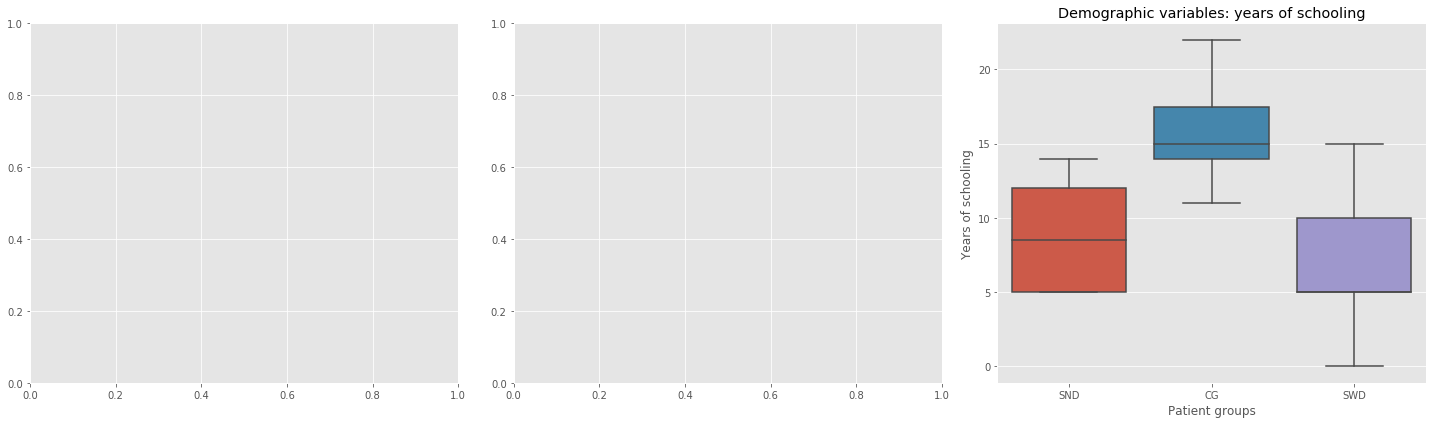

In [43]:
fig, axes = plt.subplots(1,3, figsize = (20,6), squeeze=False)
#axes[0][0] = sb.boxplot( y=edad, x=diagnostico_encoded.map( {0: 'CG', 1: 'SND', 2: 'SWD'}));
#axes[0][0].set_title('Demographic variables: age')
#axes[0][0].set_xlabel('Patient groups')
#axes[0][0].set_ylabel('Edad')

axes[0][0] = sb.boxplot( y=escolaridad, x=diagnostico_encoded.map( {0: 'CG', 1: 'SND', 2: 'SWD'}));
axes[0][0].set_title('Demographic variables: years of schooling')
axes[0][0].set_xlabel('Patient groups')
axes[0][0].set_ylabel('Years of schooling')

#axes[0][0] = sb.boxplot( y=years_em, x=diagnostico_encoded.map( {0: 'CG', 1: 'SND', 2: 'SWD'}));
#axes[0][0].set_title('Demographic variables: years of mental illness')
#axes[0][0].set_xlabel('Patient groups')
#axes[0][0].set_ylabel('Years of mental illness')
fig.tight_layout()
plt.show()

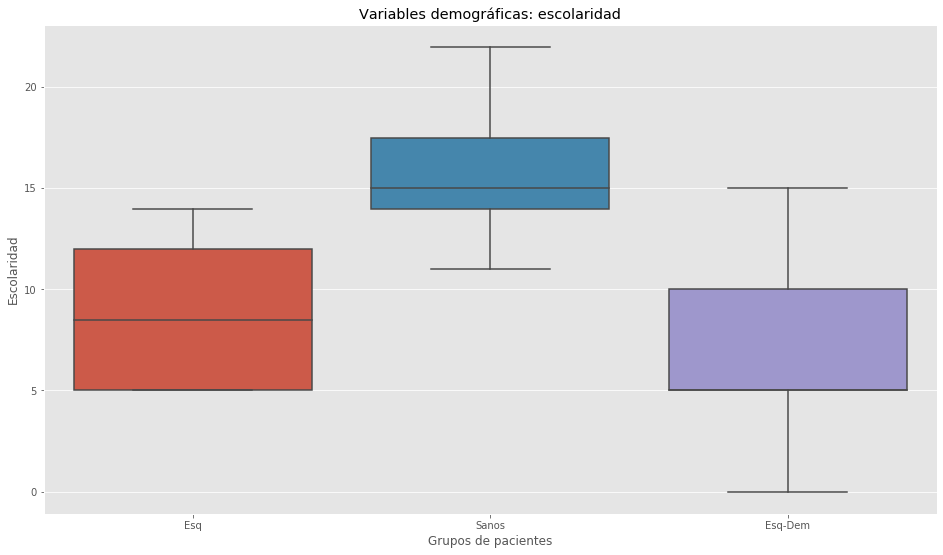

In [22]:
plot = sb.boxplot( y=escolaridad, x=diagnostico_encoded.map( {0: 'Sanos', 1: 'Esq', 2: 'Esq-Dem'}));
plot.set_title('Variables demográficas: escolaridad')
plot.set_xlabel('Grupos de pacientes')
plot.set_ylabel('Escolaridad')
plt.savefig('bloxplot_Escolaridad.png')
plt.show()

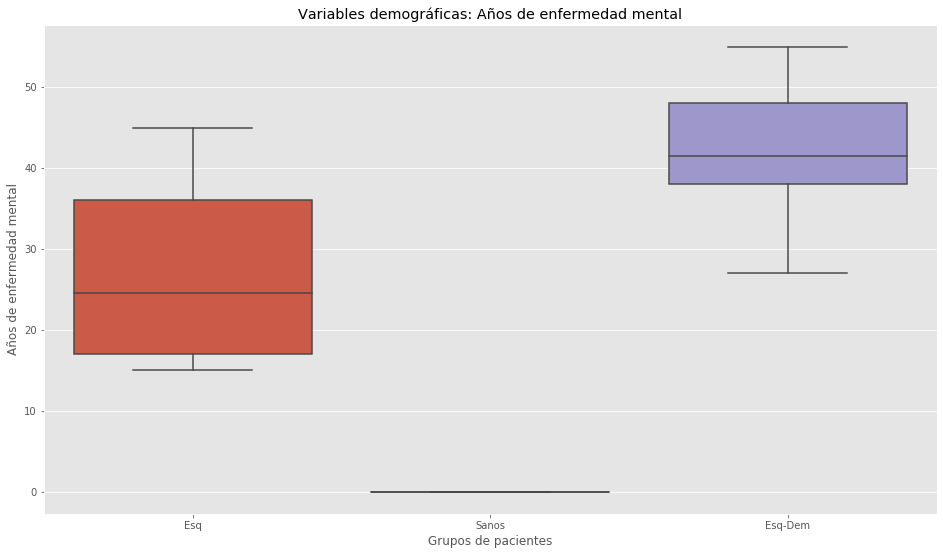

In [21]:
plot = sb.boxplot( y=years_em, x=diagnostico_encoded.map( {0: 'Sanos', 1: 'Esq', 2: 'Esq-Dem'}));
plot.set_title('Variables demográficas: Años de enfermedad mental')
plot.set_xlabel('Grupos de pacientes')
plot.set_ylabel('Años de enfermedad mental')
plt.savefig('bloxplot_years_em.png')
plt.show()

In [44]:
data_non['lhbasalnucleus']

0     372.066
1     359.641
2     426.751
3     420.023
4     228.704
       ...   
65    390.009
66    364.809
67    358.987
68    403.328
69    447.588
Name: lhbasalnucleus, Length: 70, dtype: float64